In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# URL dataset
url = "/content/NYPD_Arrest-Data_2023.csv"

# Memuat dataset langsung dari URL
df = pd.read_csv(url)
# Exploratory Data Analysis
print("Preview dataset:")
print(df.head())
print("\nDeskripsi statistik:")
print(df.describe())
# Periksa kolom dan nilai null
print("\nInfo:")
df.info()

Preview dataset:
   ARREST_KEY ARREST_DATE  PD_CD                      PD_DESC  KY_CD  \
0   261209118  01/01/2023    109     ASSAULT 2,1,UNCLASSIFIED  106.0   
1   262984267  02/03/2023    515  CONTROLLED SUBSTANCE,SALE 3  117.0   
2   263664549  02/15/2023    105            STRANGULATION 1ST  106.0   
3   261345231  01/04/2023    105            STRANGULATION 1ST  106.0   
4   263536618  02/13/2023    109     ASSAULT 2,1,UNCLASSIFIED  106.0   

         OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  \
0   FELONY ASSAULT  PL 1200501          F           K               77   
1  DANGEROUS DRUGS  PL 2203901          F           K               73   
2   FELONY ASSAULT  PL 1211200          F           K               62   
3   FELONY ASSAULT  PL 1211200          F           M               32   
4   FELONY ASSAULT  PL 12005WX          F           K               71   

   JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  X_COORD_CD  Y_COORD_CD  \
0                  0     45-

In [35]:
# Memilih fitur dan target
features = df[['PD_CD', 'PD_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO',
                 'ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude']]
target = df['OFNS_DESC']

# Menangani nilai kosong dengan imputasi sederhana (mengganti dengan nilai 'UNKNOWN' untuk kategori)
features.fillna('UNKNOWN', inplace=True)


<ipython-input-35-03529c9bf227>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna('UNKNOWN', inplace=True)


In [37]:
# Encoding data kategorikal
label_encoders = {}
for col in features.select_dtypes(include='object').columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

# Encoding target
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [47]:
# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', n_jobs=-1, random_state=42)

# Melatih model
lr_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [115]:
# Mengambil kelas unik dari y_test
unique_classes = np.unique(y_test)

# Filter target_names hanya untuk kelas yang ada, dan pastikan semuanya berupa string
filtered_target_names = [str(target_encoder.classes_[cls]) for cls in unique_classes]

# Menggunakan target_names yang telah difilter dalam classification_report
report_lr = classification_report(
    y_test,
    y_pred_lr,
    labels=unique_classes,  # Gunakan label yang sesuai dengan data uji
    target_names=filtered_target_names,
    zero_division=0  # Untuk menghindari peringatan undefined metrics
)

# Menampilkan hasil evaluasi
print("\nLaporan Klasifikasi:\n", report_lr)



Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      0.85      0.87        40
           3       0.62      1.00      0.76         8
           4       1.00      0.91      0.95        22
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        18
           7       0.99      1.00      1.00      4983
           8       0.00      0.00      0.00       100
           9       0.87      1.00      0.93       998
          10       0.00      0.00      0.00        75
          11       0.00      0.00      0.00        10
          12       0.91      0.92      0.92      1648
          13       0.96      1.00      0.98       242
          14       0.88      0.98      0.93      2328
          15       0.86      1.00      0.92      1413
          16       0.00      0.00      0.00        12
          18       0.00      0.00      0.00        10
    

In [135]:
# Dekode nama class OFNS_DESC dari target_encoder
class_names = target_encoder.classes_  # Mengambil semua nama kelas

# Decode angka menjadi nama kelas
y_test_decoded = target_encoder.inverse_transform(y_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred_lr)


In [136]:
# Gabungkan hasil prediksi dan data asli
comparison_df = decoded_features.copy()
comparison_df['True Labels'] = y_test_decoded
comparison_df['Predicted Labels'] = y_pred_decoded

# Tampilkan data asli yang telah didecode
print("Preview data asli dengan hasil prediksi:")
print(comparison_df.head())


Preview data asli dengan hasil prediksi:
        PD_CD  PD_DESC  LAW_CODE  LAW_CAT_CD  ARREST_BORO  ARREST_PRECINCT  \
95726     511       48       607           3            2               13   
14386     441      125       390           1            4              121   
136242    792       64       819           1            0               40   
78703     244       26       318           1            0               44   
72047     847      147        34           1            2                5   

        AGE_GROUP  PERP_SEX  PERP_RACE   Latitude  Longitude  True Labels  \
95726           1         1          6  40.744801 -73.991418           14   
14386           1         1          6  40.623238 -74.149217           28   
136242          1         1          2  40.810391 -73.924895           15   
78703           2         0          6  40.822622 -73.930942            9   
72047           2         1          2  40.716337 -74.001251           40   

        Predicted Labels  


In [137]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 89.18%


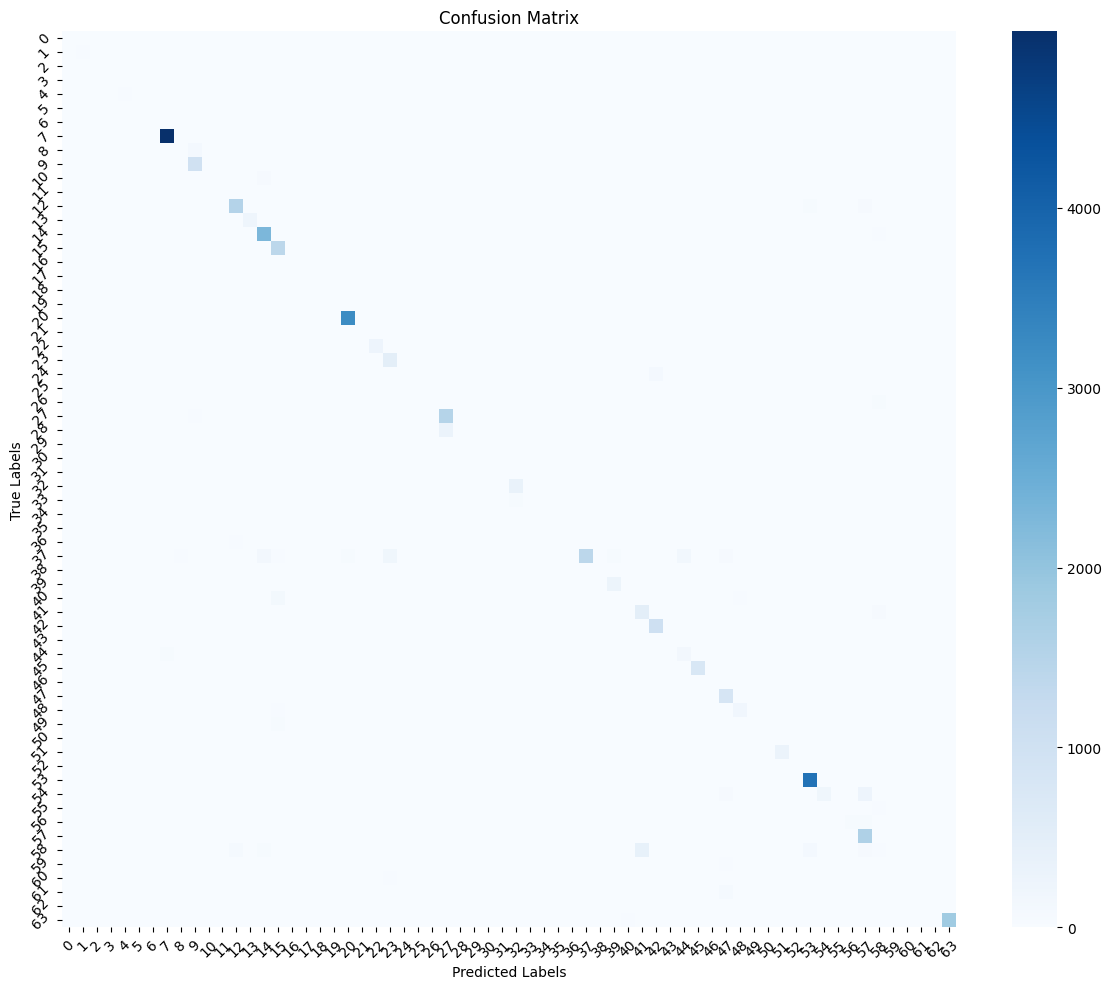

In [138]:
# Visualisasi confusion matrix tanpa angka
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=target_encoder.classes_)
# Confusion matrix dengan nama kelas
plt.figure(figsize=(12, 10))
sns.heatmap(
    conf_matrix,
    annot=False,
    cmap='Blues',
    xticklabels=target_encoder.classes_,  # Nama kelas
    yticklabels=target_encoder.classes_   # Nama kelas
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


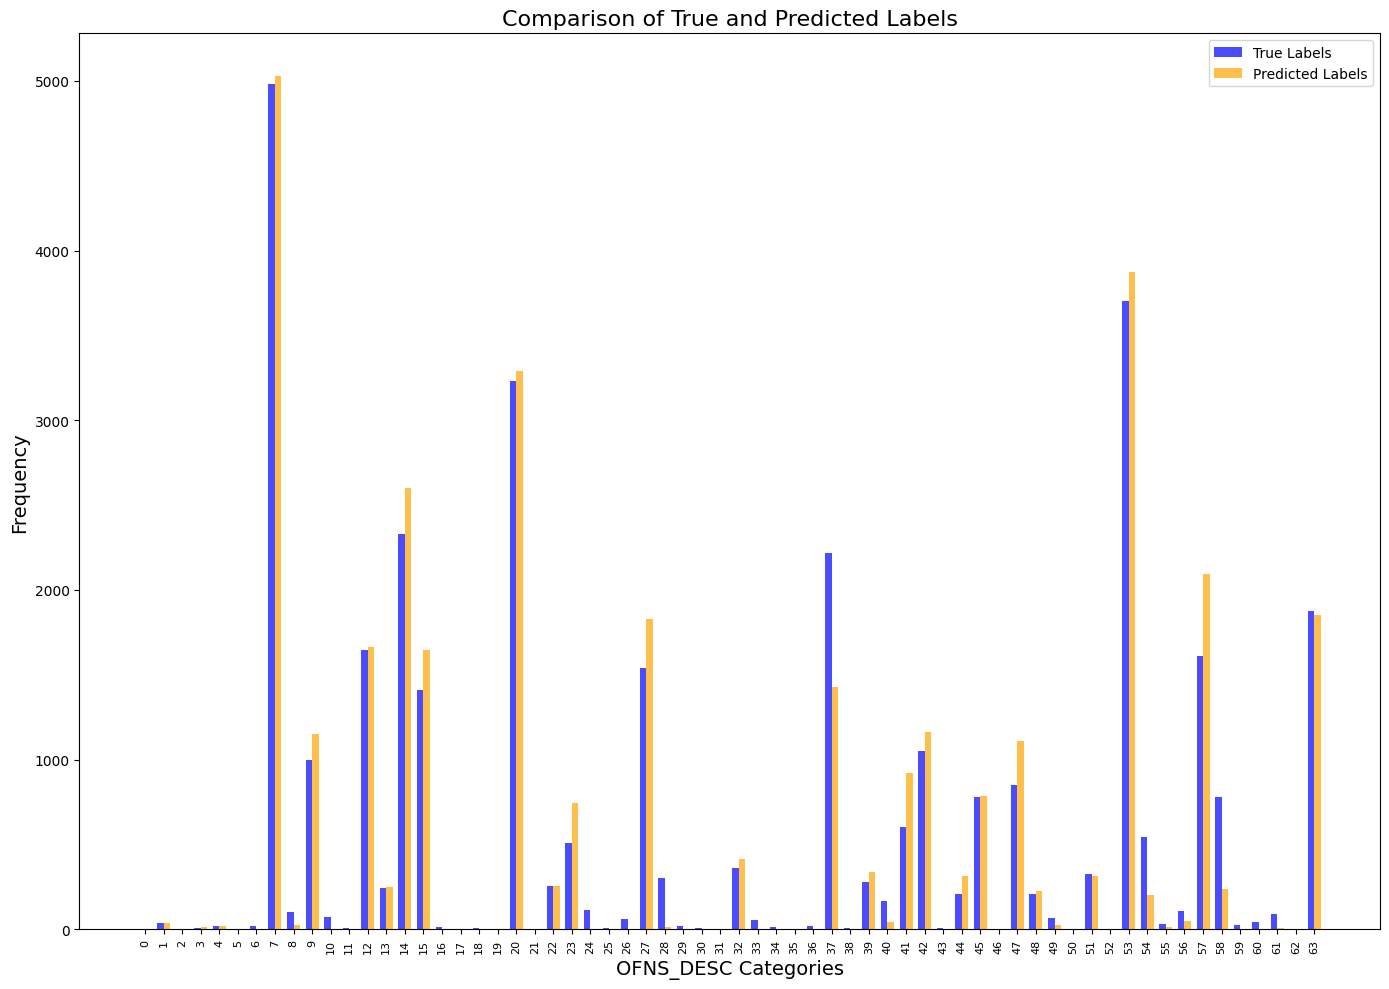

In [139]:
# Perbandingan jumlah True Labels dan Predicted Labels
comparison_df = pd.DataFrame({
    'True Labels': y_test_decoded,
    'Predicted Labels': y_pred_decoded
})

# Hitung frekuensi setiap kelas
true_counts = comparison_df['True Labels'].value_counts().reindex(target_encoder.classes_, fill_value=0)
pred_counts = comparison_df['Predicted Labels'].value_counts().reindex(target_encoder.classes_, fill_value=0)

bar_width = 0.35
index = range(len(target_encoder.classes_))

plt.figure(figsize=(14, 10))
plt.bar(index, true_counts, bar_width, label='True Labels', alpha=0.7, color='blue')
plt.bar([i + bar_width for i in index], pred_counts, bar_width, label='Predicted Labels', alpha=0.7, color='orange')

plt.xlabel('OFNS_DESC Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Comparison of True and Predicted Labels', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], target_encoder.classes_, rotation=90, fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()
